In [61]:
import pandas as pd

In [62]:
import numpy as np

In [63]:
from IPython.display import display

In [64]:
import matplotlib.pyplot as plt

In [65]:
import seaborn as sns

#Loading csv data for statistical analysis and Eda

In [66]:

data_Benin_malanville = pd.read_csv("/home/yadasa/Desktop/10-Academy-week-0/src/models/datasets/Benin/solar-measurements_benin-malanville_qc.csv", encoding='latin-1',low_memory=False)


In [67]:
Converted_to_numeric = data_Benin_malanville.apply(pd.to_numeric, errors='coerce')


In [68]:
display(data_Benin_malanville)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,yyyy-mm-dd hh:mm,W/m²,W/m²,W/m²,W/m²,W/m²,°C,%,m/s,m/s,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,NaN
1,2021-08-09 00:01,-1.2,-0.2,-1.1,0,0,26.2,93.4,0,0.4,0.1,122.1,0,998,0,0,26.3,26.2,NaN
2,2021-08-09 00:02,-1.1,-0.2,-1.1,0,0,26.2,93.6,0,0,0,0,0,998,0,0,26.3,26.2,NaN
3,2021-08-09 00:03,-1.1,-0.2,-1.1,0,0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0,26.4,26.2,NaN
4,2021-08-09 00:04,-1.1,-0.1,-1,0,0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525596,2022-08-08 23:56,-5.5,-0.1,-5.9,0,0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0,23.5,22.9,NaN
525597,2022-08-08 23:57,-5.5,-0.1,-5.8,0,0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0,23.5,22.9,NaN
525598,2022-08-08 23:58,-5.5,-0.1,-5.8,0,0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0,23.5,22.9,NaN
525599,2022-08-08 23:59,-5.5,-0.1,-5.8,0,0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0,23.5,22.9,NaN


In [69]:
null_counts = data_Benin_malanville[["GHI", "DNI", "DHI"]].isnull().sum()
print(null_counts)

GHI    0
DNI    0
DHI    0
dtype: int64


In [70]:
# Select columns of interest and compute summary statistics
summary_statistics = data_Benin_malanville[['GHI', 'DNI', 'DHI']].describe()

# Print summary statistics
print("\nSummary Statistics:")
print(summary_statistics)



Summary Statistics:
           GHI     DNI     DHI
count   525601  525601  525601
unique    8610    8906    6996
top       -1.5    -0.3    -1.4
freq     15339   47152   15025


In [71]:
# Find the column name(s) corresponding to the top values
top_values = {'GHI': -1.5, 'DNI': -0.3, 'DHI': -1.4}  # Assuming these are the top values in each column

for col, top_value in top_values.items():
    freq = summary_statistics.loc['freq', col]
    print(f"Column: {col}, Top Value: {top_value}, Frequency: {freq}")


Column: GHI, Top Value: -1.5, Frequency: 15339
Column: DNI, Top Value: -0.3, Frequency: 47152
Column: DHI, Top Value: -1.4, Frequency: 15025


In [72]:
# From tha output of the above we conclude that there is no missing value
# There is anomaly of error in the data bacuase normally the GHI, DNI and DHI should be positive

In [73]:
negative_values_count = (Converted_to_numeric[['GHI', 'DNI', 'DHI']] < 0).sum()
print("\nNegative Values Count:")
negative_values_count


Negative Values Count:


GHI    258847
DNI    275987
DHI    259182
dtype: int64

In [74]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [75]:
time_index = np.array(data_Benin_malanville.index)
print(data_Benin_malanville.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


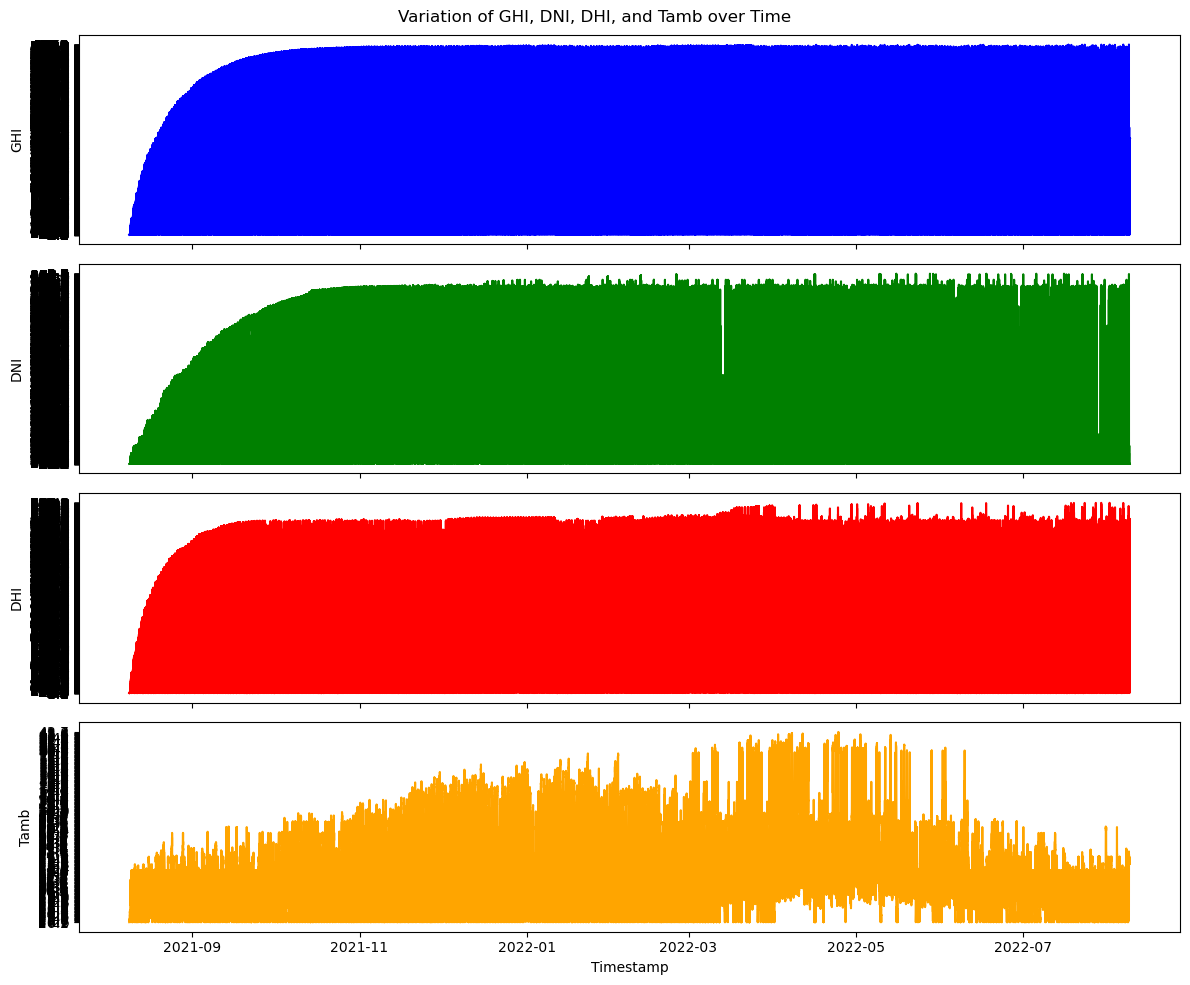

In [78]:
# Filter out rows with the placeholder string from the 'Timestamp' column
data_Benin_malanville = data_Benin_malanville[data_Benin_malanville['Timestamp'] != 'yyyy-mm-dd hh:mm']
data_Benin_malanville['Timestamp'] = pd.to_datetime(data_Benin_malanville['Timestamp'])

# Create subplots for each variable
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot GHI
axs[0].plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['GHI'].to_numpy(), label='GHI', color='blue')
axs[0].set_ylabel('GHI')

# Plot DNI
axs[1].plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['DNI'].to_numpy(), label='DNI', color='green')
axs[1].set_ylabel('DNI')

# Plot DHI
axs[2].plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['DHI'].to_numpy(), label='DHI', color='red')
axs[2].set_ylabel('DHI')

# Plot Tamb
axs[3].plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['Tamb'].to_numpy(), label='Tamb', color='orange')
axs[3].set_ylabel('Tamb')

# Add common xlabel and title
plt.xlabel('Timestamp')
plt.suptitle('Variation of GHI, DNI, DHI, and Tamb over Time')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [80]:
correlation_matrix = Converted_to_numeric[['GHI', 'DHI', 'DNI', 'TModA', 'TModB','Tamb']].corr()
# Print correlation matrix
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,GHI,DHI,DNI,TModA,TModB,Tamb
GHI,1.000000,0.849989,0.882376,0.920127,0.874338,0.547513
DHI,0.849989,1.000000,0.546602,0.825012,0.777829,0.503925
DNI,0.882376,0.546602,1.000000,0.790340,0.756007,0.467584
TModA,0.920127,0.825012,0.790340,1.000000,0.983443,0.761701
TModB,0.874338,0.777829,0.756007,0.983443,1.000000,0.823353
Tamb,0.547513,0.503925,0.467584,0.761701,0.823353,1.000000


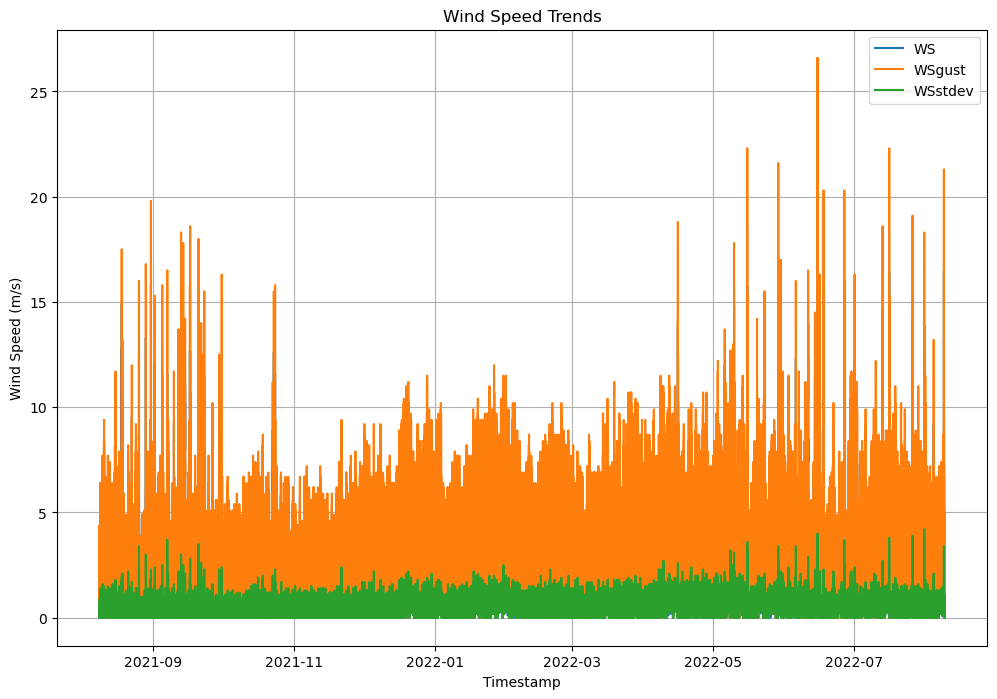

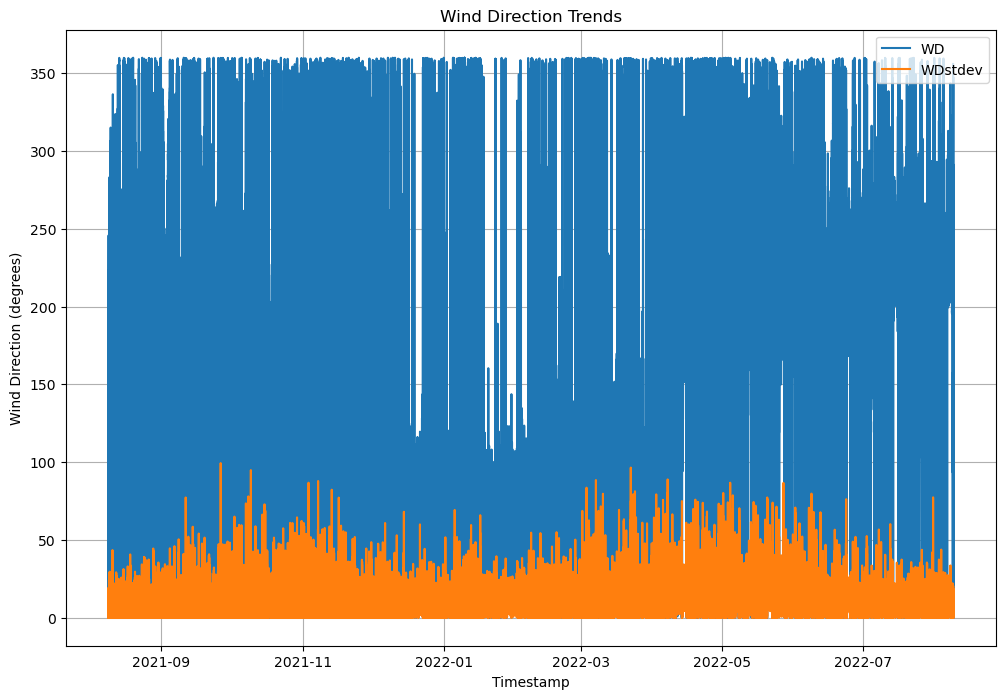

Wind Speed Summary Statistics:
[[ 0.   0.   0. ]
 [ 1.   1.3  0.4]
 [ 1.9  2.6  0.5]
 [ 3.1  4.1  0.6]
 [19.5 26.6  4.2]]

Wind Direction Summary Statistics:
[[  0.    0. ]
 [ 59.    3.7]
 [181.    8.6]
 [235.1  12.3]
 [360.   99.4]]


In [93]:
# Convert non-numeric values to NaN and convert DataFrame columns to numpy arrays
ws_data = pd.to_numeric(data_Benin_malanville['WS'], errors='coerce').dropna().to_numpy()
wsgust_data = pd.to_numeric(data_Benin_malanville['WSgust'], errors='coerce').dropna().to_numpy()
wsstdev_data = pd.to_numeric(data_Benin_malanville['WSstdev'], errors='coerce').dropna().to_numpy()
wd_data = pd.to_numeric(data_Benin_malanville['WD'], errors='coerce').dropna().to_numpy()
wdstdev_data = pd.to_numeric(data_Benin_malanville['WDstdev'], errors='coerce').dropna().to_numpy()

data_Benin_malanville = data_Benin_malanville[data_Benin_malanville['Timestamp'] != 'yyyy-mm-dd hh:mm']
data_Benin_malanville['Timestamp'] = pd.to_datetime(data_Benin_malanville['Timestamp'])
# Plot wind speed data
plt.figure(figsize=(12, 8))
plt.plot(data_Benin_malanville['Timestamp'].to_numpy(), ws_data, label='WS')
plt.plot(data_Benin_malanville['Timestamp'].to_numpy(), wsgust_data, label='WSgust')
plt.plot(data_Benin_malanville['Timestamp'].to_numpy(), wsstdev_data, label='WSstdev')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Trends')
plt.legend()
plt.grid(True)
plt.show()



# Plot wind direction data
plt.figure(figsize=(12, 8))
plt.plot(data_Benin_malanville['Timestamp'].to_numpy(), wd_data, label='WD')
plt.plot( data_Benin_malanville['Timestamp'].to_numpy(), wdstdev_data, label='WDstdev')
plt.xlabel('Timestamp')
plt.ylabel('Wind Direction (degrees)')
plt.title('Wind Direction Trends')
plt.legend()
plt.grid(True)
plt.show()

# Calculate summary statistics for wind speed
wind_speed_stats = np.vstack((ws_data, wsgust_data, wsstdev_data)).T
wind_speed_stats_summary = np.vstack((np.min(wind_speed_stats, axis=0),
                                      np.percentile(wind_speed_stats, 25, axis=0),
                                      np.median(wind_speed_stats, axis=0),
                                      np.percentile(wind_speed_stats, 75, axis=0),
                                      np.max(wind_speed_stats, axis=0)))
print("Wind Speed Summary Statistics:")
print(wind_speed_stats_summary)

# Calculate summary statistics for wind direction
wind_direction_stats = np.vstack((wd_data, wdstdev_data)).T
wind_direction_stats_summary = np.vstack((np.min(wind_direction_stats, axis=0),
                                          np.percentile(wind_direction_stats, 25, axis=0),
                                          np.median(wind_direction_stats, axis=0),
                                          np.percentile(wind_direction_stats, 75, axis=0),
                                          np.max(wind_direction_stats, axis=0)))
print("\nWind Direction Summary Statistics:")
print(wind_direction_stats_summary)

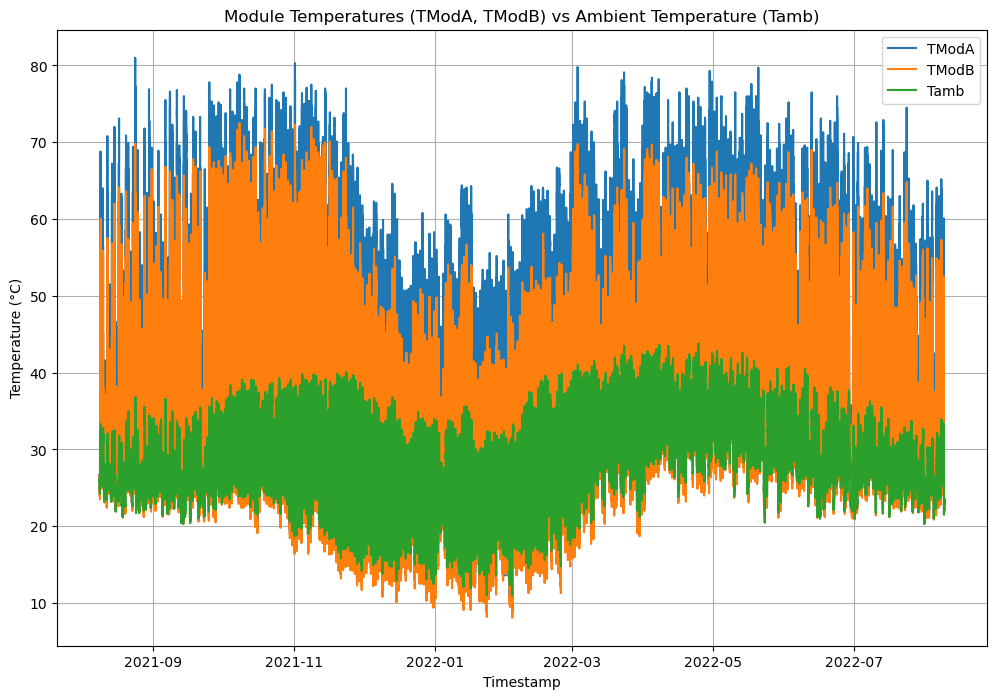

Correlation between temperatures:
          TModA     TModB      Tamb
TModA  1.000000  0.983443  0.761701
TModB  0.983443  1.000000  0.823353
Tamb   0.761701  0.823353  1.000000
        TModA_diff  TModB_diff
1              0.1         0.0
2              0.1         0.0
3              0.2         0.0
4              0.2         0.1
5              0.2         0.1
...            ...         ...
525596         0.4        -0.2
525597         0.4        -0.2
525598         0.4        -0.2
525599         0.4        -0.2
525600         0.4        -0.2

[525600 rows x 2 columns]


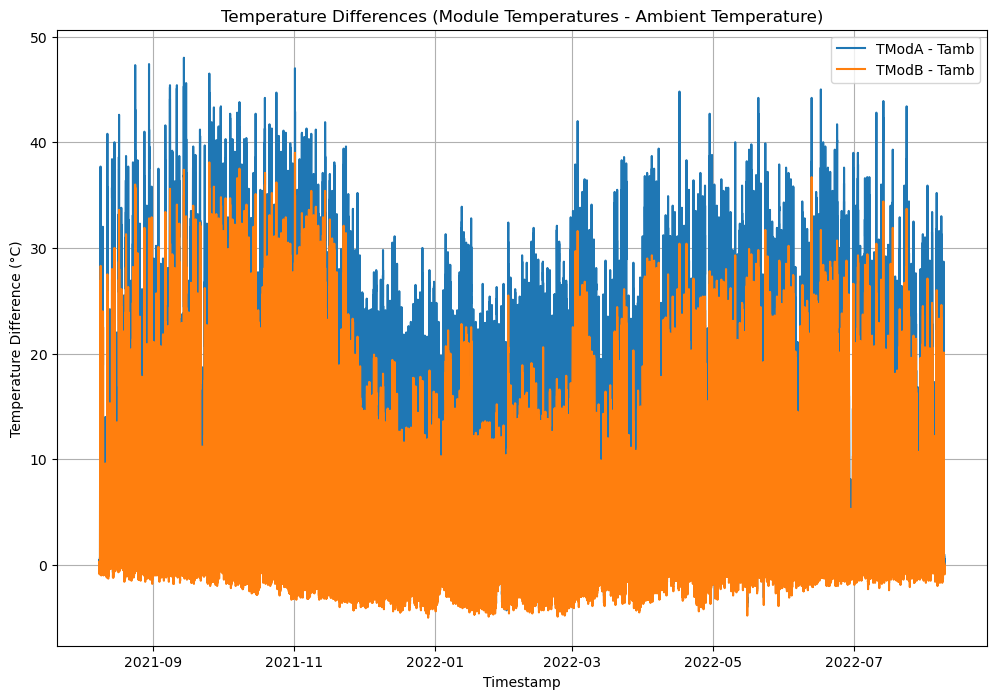

In [94]:
# Plot module temperatures and ambient temperature

data_Benin_malanville = data_Benin_malanville[data_Benin_malanville['Timestamp'] != 'yyyy-mm-dd hh:mm']
data_Benin_malanville['Timestamp'] = pd.to_datetime(data_Benin_malanville['Timestamp'])
plt.figure(figsize=(12, 8))
plt.plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['TModA'].to_numpy(), label='TModA')
plt.plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['TModB'].to_numpy(), label='TModB')
plt.plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['Tamb'].to_numpy(), label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Module Temperatures (TModA, TModB) vs Ambient Temperature (Tamb)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate correlation coefficients
temperature_correlation = data_Benin_malanville[['TModA', 'TModB', 'Tamb']].corr()
print("Correlation between temperatures:")
print(temperature_correlation)

# Convert temperature columns to numeric
data_Benin_malanville['TModA'] = pd.to_numeric(data_Benin_malanville['TModA'], errors='coerce')
data_Benin_malanville['TModB'] = pd.to_numeric(data_Benin_malanville['TModB'], errors='coerce')
data_Benin_malanville['Tamb'] = pd.to_numeric(data_Benin_malanville['Tamb'], errors='coerce')

# Calculate temperature differences
data_Benin_malanville['TModA_diff'] = data_Benin_malanville['TModA'] - data_Benin_malanville['Tamb']
data_Benin_malanville['TModB_diff'] = data_Benin_malanville['TModB'] - data_Benin_malanville['Tamb']
print(data_Benin_malanville[['TModA_diff', 'TModB_diff']])



# Plot temperature differences
plt.figure(figsize=(12, 8))
plt.plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['TModA_diff'].to_numpy(), label='TModA - Tamb')
plt.plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['TModB_diff'].to_numpy(), label='TModB - Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Temperature Difference (°C)')
plt.title('Temperature Differences (Module Temperatures - Ambient Temperature)')
plt.legend()
plt.grid(True)
plt.show()

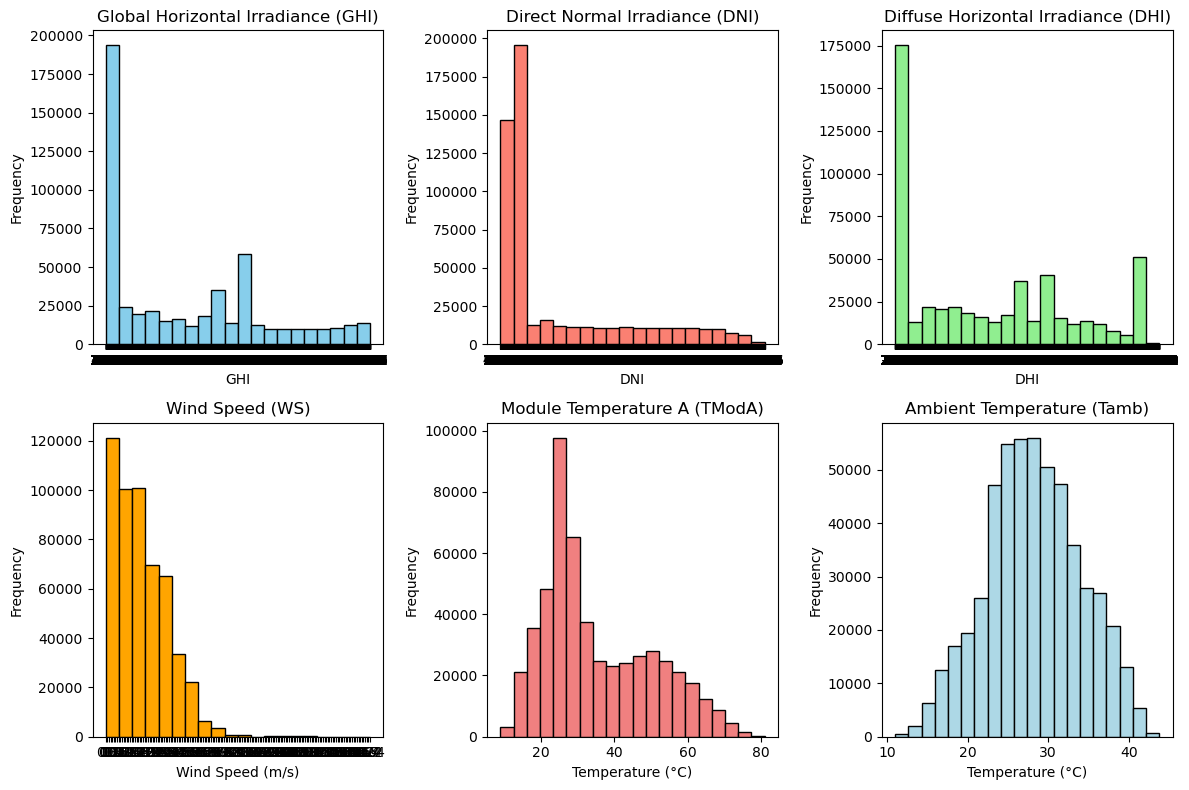

In [83]:
# Create histograms
plt.figure(figsize=(12, 8))

# Histogram for GHI
plt.subplot(2, 3, 1)
plt.hist(data_Benin_malanville['GHI'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Global Horizontal Irradiance (GHI)')

# Histogram for DNI
plt.subplot(2, 3, 2)
plt.hist(data_Benin_malanville['DNI'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('DNI')
plt.ylabel('Frequency')
plt.title('Direct Normal Irradiance (DNI)')

# Histogram for DHI
plt.subplot(2, 3, 3)
plt.hist(data_Benin_malanville['DHI'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('DHI')
plt.ylabel('Frequency')
plt.title('Diffuse Horizontal Irradiance (DHI)')

# Histogram for WS
plt.subplot(2, 3, 4)
plt.hist(data_Benin_malanville['WS'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Wind Speed (WS)')

# Histogram for TModA
plt.subplot(2, 3, 5)
plt.hist(data_Benin_malanville['TModA'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Module Temperature A (TModA)')

# Histogram for Tamb
plt.subplot(2, 3, 6)
plt.hist(data_Benin_malanville['Tamb'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Ambient Temperature (Tamb)')

plt.tight_layout()
plt.show()


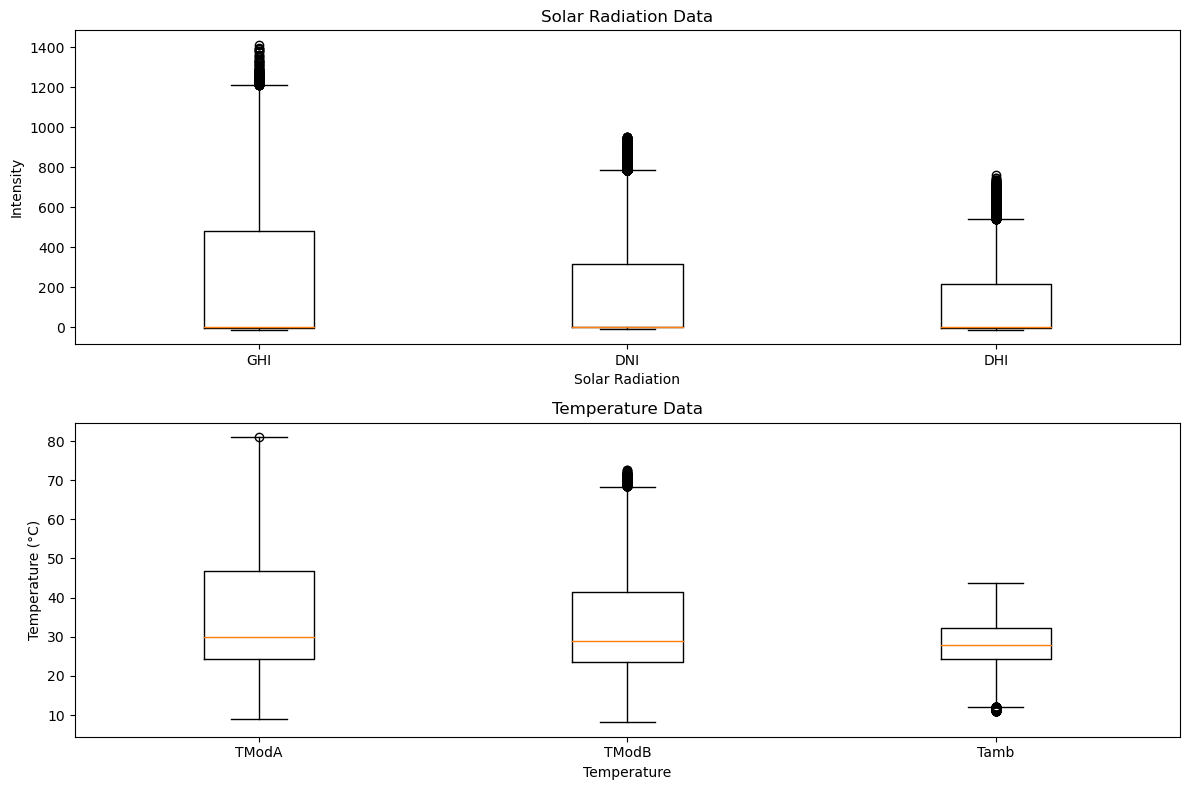

In [84]:
# Convert data to numeric type
data_Benin_malanville['GHI'] = pd.to_numeric(data_Benin_malanville['GHI'], errors='coerce')
data_Benin_malanville['DNI'] = pd.to_numeric(data_Benin_malanville['DNI'], errors='coerce')
data_Benin_malanville['DHI'] = pd.to_numeric(data_Benin_malanville['DHI'], errors='coerce')
data_Benin_malanville['TModA'] = pd.to_numeric(data_Benin_malanville['TModA'], errors='coerce')
data_Benin_malanville['TModB'] = pd.to_numeric(data_Benin_malanville['TModB'], errors='coerce')
data_Benin_malanville['Tamb'] = pd.to_numeric(data_Benin_malanville['Tamb'], errors='coerce')

plt.figure(figsize=(12, 8))

# Box plot for solar radiation
plt.subplot(2, 1, 1)
plt.boxplot([data_Benin_malanville['GHI'].dropna(), data_Benin_malanville['DNI'].dropna(), data_Benin_malanville['DHI'].dropna()], labels=['GHI', 'DNI', 'DHI'])
plt.xlabel('Solar Radiation')
plt.ylabel('Intensity')
plt.title('Solar Radiation Data')

# Box plot for temperature
plt.subplot(2, 1, 2)
plt.boxplot([data_Benin_malanville['TModA'].dropna(), data_Benin_malanville['TModB'].dropna(), data_Benin_malanville['Tamb'].dropna()], labels=['TModA', 'TModB', 'Tamb'])
plt.xlabel('Temperature')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Data')

plt.tight_layout()
plt.show()

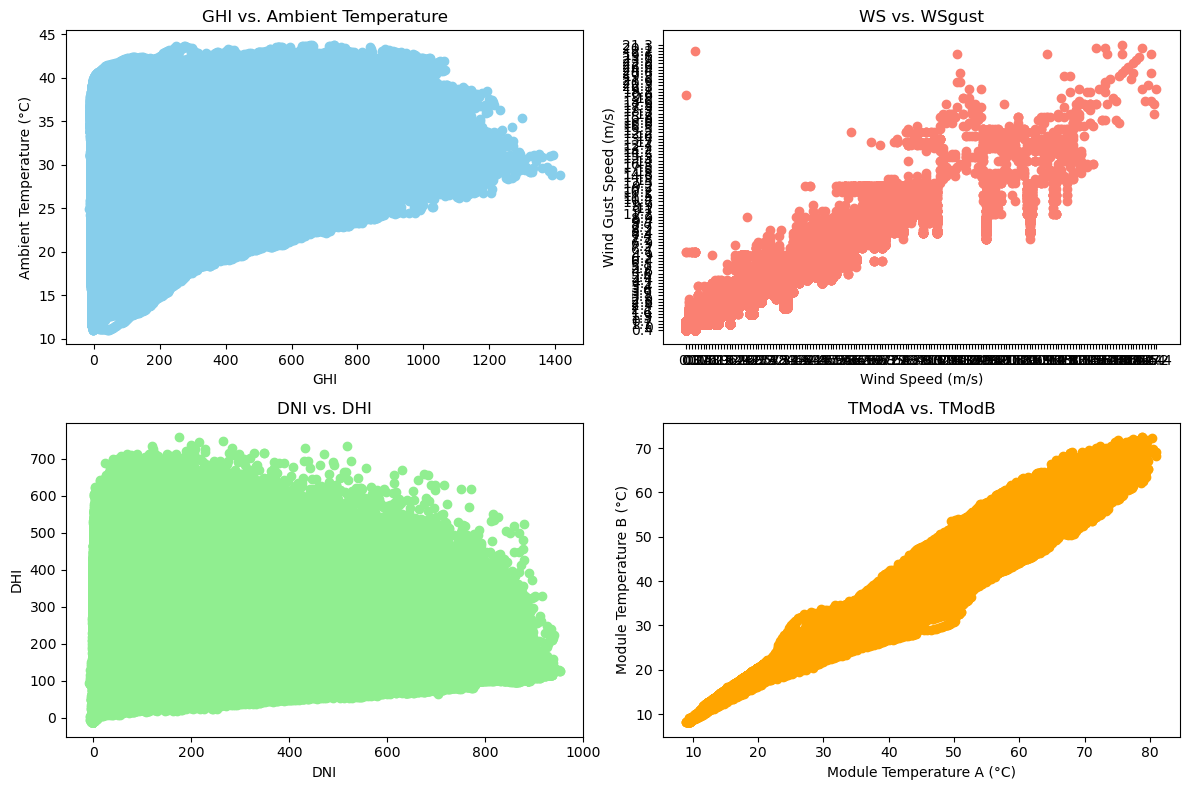

In [85]:
# Generate scatter plots
plt.figure(figsize=(12, 8))

# GHI vs. Tamb
plt.subplot(2, 2, 1)
plt.scatter(data_Benin_malanville['GHI'], data_Benin_malanville['Tamb'], color='skyblue')
plt.xlabel('GHI')
plt.ylabel('Ambient Temperature (°C)')
plt.title('GHI vs. Ambient Temperature')

# WS vs. WSgust
plt.subplot(2, 2, 2)
plt.scatter(data_Benin_malanville['WS'], data_Benin_malanville['WSgust'], color='salmon')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Gust Speed (m/s)')
plt.title('WS vs. WSgust')

# DNI vs. DHI
plt.subplot(2, 2, 3)
plt.scatter(data_Benin_malanville['DNI'], data_Benin_malanville['DHI'], color='lightgreen')
plt.xlabel('DNI')
plt.ylabel('DHI')
plt.title('DNI vs. DHI')

# TModA vs. TModB
plt.subplot(2, 2, 4)
plt.scatter(data_Benin_malanville['TModA'], data_Benin_malanville['TModB'], color='orange')
plt.xlabel('Module Temperature A (°C)')
plt.ylabel('Module Temperature B (°C)')
plt.title('TModA vs. TModB')

plt.tight_layout()
plt.show()


In [86]:
# Step 1: Identify missing values
missing_values = data_Benin_malanville.isnull().sum()
print("Missing Values:")
print(missing_values)

# Step 2: Handle missing values in the Comments column
# if the columns appears entirely null and doesn't provide valuable information, you can drop it
if 'Comments' in data_Benin_malanville.columns:
    data_Benin_malanville.drop('Comments', axis=1, inplace=True)

# Step 3: Handle anomalies (if any)
# You can use statistical methods or domain knowledge to identify anomalies and decide how to handle them

# After cleaning, you may want to check the dataset again to ensure that missing values and anomalies have been properly addressed
cleaned_missing_values = data_Benin_malanville.isnull().sum()
print("\nMissing Values after cleaning:")
print(cleaned_missing_values)


Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
TModA_diff            0
TModB_diff            0
dtype: int64

Missing Values after cleaning:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
TModA_diff       0
TModB_diff       0
dtype: int64


In [89]:
data_Benin_parakou =pd.read_csv("/home/yadasa/Desktop/10-Academy-week-0/src/models/datasets/Benin/solar-measurements_benin-parakou_qc.csv",encoding='latin-1',low_memory=False)

In [87]:
data_SierraLeone_bumbuna=pd.read_csv("/home/yadasa/Desktop/10-Academy-week-0/src/models/datasets/Sirearra-Leone/solar-measurements_sierraleone-kenema_qc.csv" ,encoding='latin-1',low_memory=False)

In [147]:
# data_SierraLeone_kenema=pd.read_csv("/home/yadasa/Desktop/10-Academy-week-0/src/models/datasets/Sirearra-Leone/solar-measurements_sierraleone-kenema_qc.csv" ,encoding='latin-1',low_memory=False)

In [148]:
data_Togo_togodapaong = pd.read_csv("/home/yadasa/Desktop/10-Academy-week-0/src/models/datasets/Togo/solar-measurements_togo-dapaong_qc.csv" ,encoding='latin-1',low_memory=False)

In [149]:
# data_Togo_togodavie = pd.read_csv("/home/yadasa/Desktop/10-Academy-week-0/src/models/datasets/Togo/solar-measurements_togo-davie_qc.csv",encoding='latin-1',low_memory=False)

In [150]:
print("Summary Statistics for Benin Malanville Dataset:")

Summary Statistics for Benin Malanville Dataset:


In [151]:
print(data_Benin_malanville.describe())


       Comments
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN


In [ ]:
print("\nSummary Statistics for Sierra Leone Bumbuna Dataset:")


In [ ]:
print(data_SierraLeone_bumbuna.describe())


In [ ]:
print("\nSummary Statistics for Sierra Leone Kenema Dataset:")


In [ ]:
print(data_SierraLeone_kenema.describe())


In [ ]:
print("\nSummary Statistics for Togo Dapaong Dataset:")


In [ ]:
print(data_Togo_togodapaong.describe())
